In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("cupcake.csv")
df.head(5)

,Mese,Cupcake
0,2004-01,5
1,2004-02,5
2,2004-03,4
3,2004-04,6
4,2004-05,5


In [6]:
min_value = df["Cupcake"].min()
max_value = df["Cupcake"].max()
print(min_value)
print(max_value)


4
100


In [9]:
categorias = np.linspace(min_value,max_value,4)
categorias

array([  4.,  36.,  68., 100.])

In [10]:
etiquetas = ["pequeño", "mediano", "grande"]

In [12]:
df['contenedores'] = pd.cut(df['Cupcake'], bins=categorias, labels=etiquetas, include_lowest=True)

(array([68., 74., 62.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

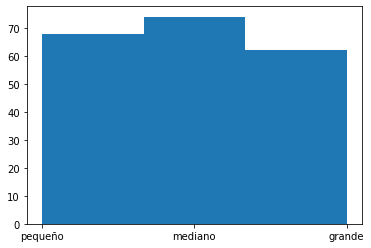

In [15]:
plt.hist(df['contenedores'], bins=3)

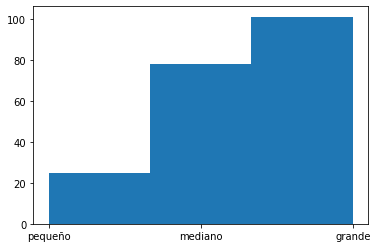

In [17]:
bins = [ 0, 10, 50, 100 ]
df['bin_cut_manual'] = pd.cut(df['Cupcake'] , bins=bins, labels=etiquetas, include_lowest=True)
plt.hist(df['bin_cut_manual'], bins=3)
plt.show()

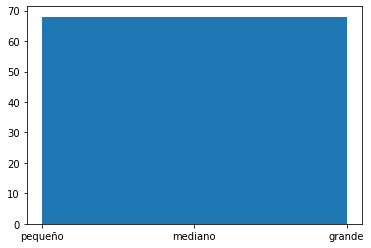

In [20]:
df['bin_qcut'] = pd.qcut(df['Cupcake'], q=3, precision=1, labels=etiquetas)
plt.hist(df['bin_qcut'], bins=3)
plt.show()

In [21]:
from scipy.stats import binned_statistic
x_data = np.arange(0, len(df))
y_data = df['Cupcake']
x_bins,bin_edges, misc = binned_statistic(y_data,x_data, statistic="median", bins=2)

In [22]:
bin_intervals = pd.IntervalIndex.from_arrays(bin_edges[:-1], bin_edges[1:])

In [23]:
def set_to_median(x, bin_intervals):
    for interval in bin_intervals:
        if x in interval:
            return interval.mid

In [24]:
df['sampled_cupcake'] = df['Cupcake'].apply(lambda x: set_to_median(x, bin_intervals))

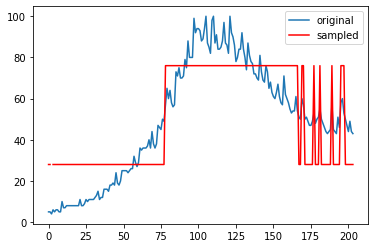

In [25]:
plt.plot(df['Cupcake'], label='original')
plt.plot(df['sampled_cupcake'], color='red', label='sampled')
plt.legend()
plt.show()

In [26]:
y_bins = (bin_edges[:-1]+bin_edges[1:])/2
y_bins

array([28., 76.])

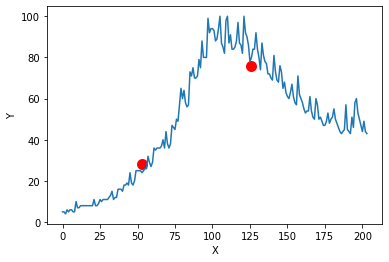

In [27]:
plt.plot(x_data,y_data)
plt.xlabel("X"); 
plt.ylabel("Y")
plt.scatter(x_bins, y_bins,  color= 'red',linewidth=5)
plt.show()

In [ ]:
conda install -c conda-forge jenkspy

In [ ]:
import jenkspy
breaks = jenkspy.jenks_breaks(df['Cupcake'], nb_class=3)

In [ ]:
df['bin_cut_break'] = pd.cut(df['Cupcake'] , bins=breaks, labels=etiquetas, include_lowest=True)